In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
required_cols = ['Country',
                 'Region',
                 'Population',
                 'Coastline (coast/area ratio)',
                 'GDP ($ per capita)',
                 'Literacy (%)',
                 'Birthrate']

In [7]:
countries = pd.read_csv('./datasets/countries_of_the_world.csv', usecols = required_cols, decimal = ',')

In [8]:
countries.head(10)

,Country,Region,Population,Coastline (coast/area ratio),GDP ($ per capita),Literacy (%),Birthrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,0.00,700.0,36.0,46.60
1,Albania,EASTERN EUROPE,3581655,1.26,4500.0,86.5,15.11
2,Algeria,NORTHERN AFRICA,32930091,0.04,6000.0,70.0,17.14
3,American Samoa,OCEANIA,57794,58.29,8000.0,97.0,22.46
4,Andorra,WESTERN EUROPE,71201,0.00,19000.0,100.0,8.71
5,Angola,SUB-SAHARAN AFRICA,12127071,0.13,1900.0,42.0,45.11
6,Anguilla,LATIN AMER. & CARIB,13477,59.80,8600.0,95.0,14.17
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,34.54,11000.0,89.0,16.93
8,Argentina,LATIN AMER. & CARIB,39921833,0.18,11200.0,97.1,16.73
9,Armenia,C.W. OF IND. STATES,2976372,0.00,3500.0,98.6,12.07


In [10]:
countries.rename(columns = {'GDP ($ per capita)' : 'PerCapitaGDP',
                            'Coastline (coast/area ratio)' : 'CoastlineAreaRatio',
                            'Literacy (%)' :  'LiteracyRate'},
                            inplace = True)

In [11]:
countries = countries.dropna()

In [12]:
countries.head()

,Country,Region,Population,CoastlineAreaRatio,PerCapitaGDP,LiteracyRate,Birthrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,0.00,700.0,36.0,46.60
1,Albania,EASTERN EUROPE,3581655,1.26,4500.0,86.5,15.11
2,Algeria,NORTHERN AFRICA,32930091,0.04,6000.0,70.0,17.14
3,American Samoa,OCEANIA,57794,58.29,8000.0,97.0,22.46
4,Andorra,WESTERN EUROPE,71201,0.00,19000.0,100.0,8.71


In [15]:
countries['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [16]:
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [17]:
avg_by_region = countries.groupby(by = 'Region').mean()
avg_by_region

,Population,CoastlineAreaRatio,PerCapitaGDP,LiteracyRate,Birthrate
Region,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,17.926786,8053.571429,79.553571,21.157857
BALTICS,2.394991e+06,3.116667,11300.000000,99.733333,9.343333
C.W. OF IND. STATES,2.334013e+07,0.093333,4000.000000,98.725000,17.855833
EASTERN EUROPE,1.231617e+07,1.547500,11175.000000,97.600000,10.330000
LATIN AMER. & CARIB,1.276627e+07,16.111591,8488.636364,90.654545,19.197500
NEAR EAST,1.365565e+07,3.323571,11850.000000,79.521429,23.527857
NORTHERN AFRICA,3.222682e+07,0.298000,5460.000000,67.240000,20.814000
NORTHERN AMERICA,8.290399e+07,61.540000,27625.000000,97.750000,12.460000
OCEANIA,2.027042e+06,113.983750,10056.250000,91.262500,20.910000


<AxesSubplot:ylabel='Birthrate'>

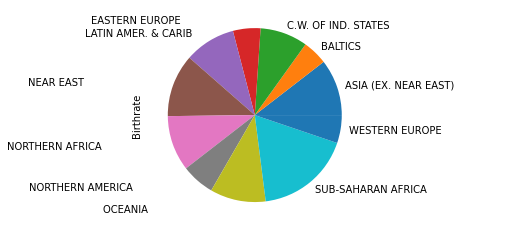

In [22]:
avg_by_region.Birthrate.plot(kind = 'pie')


<AxesSubplot:title={'center':'Avg. Birthrate by Region'}, ylabel='Region'>

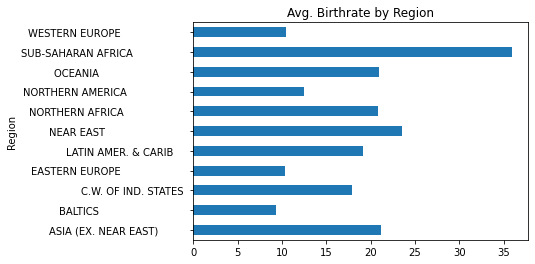

In [23]:
avg_by_region.Birthrate.plot(kind = 'barh',
                             title = 'Avg. Birthrate by Region')


In [24]:
pop_by_region = countries[['Region','Population']].groupby(by = 'Region').sum()
pop_by_region

,Population
Region,
ASIA (EX. NEAR EAST),3687982236
BALTICS,7184974
C.W. OF IND. STATES,280081548
EASTERN EUROPE,98529328
LATIN AMER. & CARIB,561715994
NEAR EAST,191179128
NORTHERN AFRICA,161134125
NORTHERN AMERICA,331615946
OCEANIA,32432670


<AxesSubplot:ylabel='Population'>

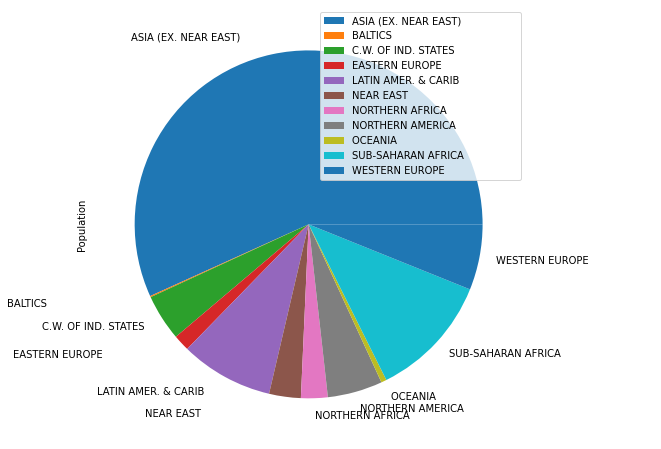

In [35]:
pop_by_region.plot.pie(y='Population',
                       figsize =(8,8))

<AxesSubplot:ylabel='Population'>

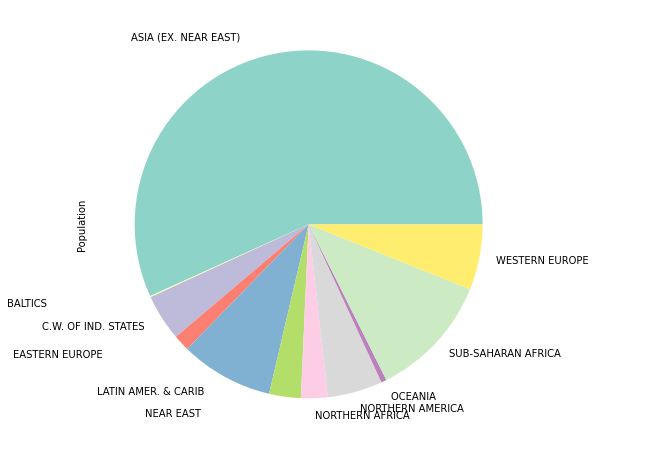

In [40]:
pop_by_region.plot.pie(y='Population',
                       figsize =(8,8),
                       legend = False,
                       cmap = 'Set3')

In [41]:
countries['Birthrate'].describe()

count    207.000000
mean      22.312802
std       11.188104
min        7.290000
25%       12.835000
50%       18.900000
75%       29.770000
max       50.730000
Name: Birthrate, dtype: float64

<AxesSubplot:>

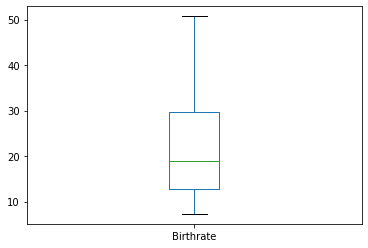

In [42]:
countries['Birthrate'].plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

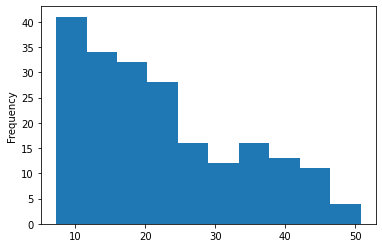

In [43]:
countries['Birthrate'].plot(kind = 'hist')

<AxesSubplot:>

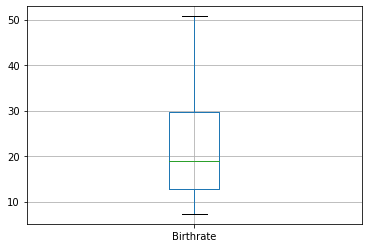

In [44]:
countries['Birthrate'].plot(kind = 'box',
                            grid = True)

<AxesSubplot:ylabel='Frequency'>

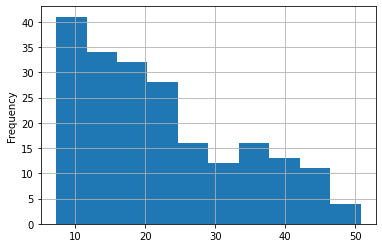

In [45]:
countries['Birthrate'].plot(kind = 'hist',
                            grid = True)

<AxesSubplot:>

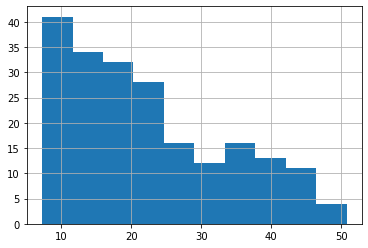

In [46]:
countries['Birthrate'].hist()

<AxesSubplot:>

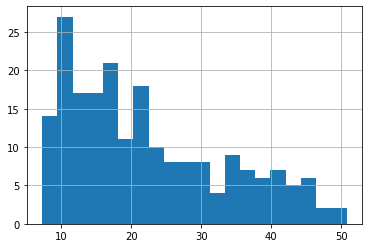

In [47]:
countries['Birthrate'].hist(bins = 20)

<AxesSubplot:xlabel='PerCapitaGDP', ylabel='LiteracyRate'>

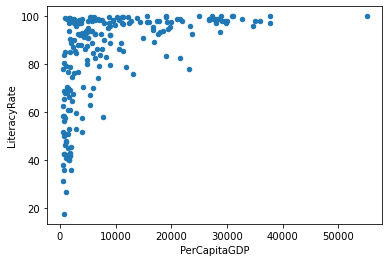

In [49]:
countries.plot.scatter(x = 'PerCapitaGDP',
                  y = 'LiteracyRate')

<AxesSubplot:xlabel='PerCapitaGDP', ylabel='Birthrate'>

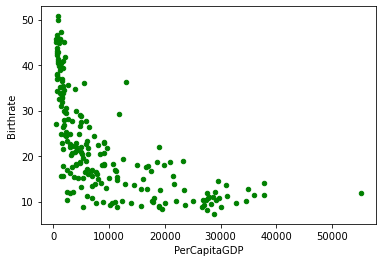

In [51]:
countries.plot.scatter(x = 'PerCapitaGDP',
                       y = 'Birthrate',
                      color = 'green')